# 网络科学 Networkx 实验

In [1]:
# %pip install networkx


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import networkx as nx
import matplotlib.pyplot as plt

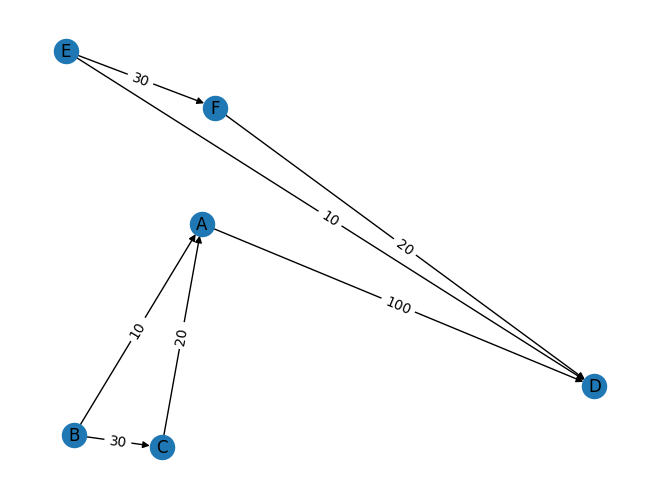

In [14]:
G = nx.DiGraph()
G.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F'])
G.add_weighted_edges_from([('B', 'C', 30), ('B', 'A', 10), ('C', 'A', 20),
                           ('A', 'D', 100),
                           ('E', 'F', 30), ('E', 'D', 10), ('F', 'D', 20)
                           ])
# 绘制图形
pos = nx.spring_layout(G)  # 布局算法
nx.draw(G, pos, with_labels=True)

# 绘制带权重的边
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()

In [26]:
# 节点数
N = G.number_of_nodes()
# 边数
L = G.number_of_edges()
# 理论上的最大节点数
L_max = N*(N-1)
# 密度
d = round(nx.density(G), 2)
# A节点的度和强度
k_A_in = G.in_degree('A')
k_A_out = G.out_degree('A')
k_A_tot = G.degree('A')
s_A_in = G.in_degree('A', weight='weight')
s_A_out = G.out_degree('A', weight='weight')
s_A_tot = G.degree('A', weight='weight')
# 平均度和强度
avg_k_in = round(sum(dict(G.in_degree()).values()) / N, 2)
avg_k_out = round(sum(dict(G.out_degree()).values()) / N, 2)
avg_k_tot = round(sum(dict(G.degree()).values()) / N, 2)
avg_s_in = round(sum(dict(G.in_degree(weight='weight')).values()) / N, 2)
avg_s_out = round(sum(dict(G.out_degree(weight='weight')).values()) / N, 2)
avg_s_tot = round(sum(dict(G.degree(weight='weight')).values()) / N, 2)

print(f'{N=}, {L=}, {L_max=}, {d=}')
print(f'{k_A_in=}, {k_A_out=}, {k_A_tot=}, {s_A_in=}, {s_A_out=}, {s_A_tot=}')
print(f'{avg_k_in=}, {avg_k_out=}, {avg_k_tot=}')
print(f'{avg_s_in=}, {avg_s_out=}, {avg_s_tot=}')


N=6, L=7, L_max=30, d=0.23
k_A_in=2, k_A_out=1, k_A_tot=3, s_A_in=30, s_A_out=100, s_A_tot=130
avg_k_in=1.17, avg_k_out=1.17, avg_k_tot=2.33
avg_s_in=36.67, avg_s_out=36.67, avg_s_tot=73.33
